In [86]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
font = {'size'   : 22}
mpl.rc('font', **font)

mpl.rcParams['lines.markersize'] = 1
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [3]:
dfreg = pd.read_csv("./bases/wdi/Country.csv")

In [4]:
df = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [5]:
dfregmerge = dfreg[['CountryCode','Region','IncomeGroup']].copy()
dfregmerge.rename(columns={'CountryCode':'countrycode','Region':'region','IncomeGroup':'incomegroup'},inplace=True)

In [6]:
dfx = df[df.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

In [7]:
dfx

,countrycode,year,value
0,ALB,2000,4026.537422
1,ATG,2000,14987.411027
2,ARG,2000,11810.061364
3,ARM,2000,2318.238073
4,ABW,2000,NaN
5,AUS,2000,26406.130951
6,AUT,2000,29357.485725
7,BHS,2000,20487.343180
8,BHR,2000,35622.601699
9,BRB,2000,12275.054497


In [8]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])

In [9]:
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [118]:
df2 = pd.merge(dfmasc, dfregmerge, on='countrycode')
df2.region.unique()
#df2 = df2.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
#       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
#       'North America':4, 'Sub-Saharan Africa':5})
regioes = ['Europe & Central Asia', 'Latin America & Caribbean',
       'East Asia & Pacific', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'North America', 'South Asia']
df2['idregion'] = df2['region'].apply(lambda x: regioes.index(x) )
df2['idregion'] = pd.to_numeric(df2['idregion'])

In [119]:
df2['incomegroup'].unique()


array(['Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD', 'Low income'],
      dtype=object)

In [120]:
incomegroups = list(df2['incomegroup'].unique())
df2['idincome'] = df2['incomegroup'].apply(lambda x: incomegroups.index(x))
df2['idincome'] = df2['incomegroup'].apply(lambda x: incomegroups.index(x))
df2['idincome'] = pd.to_numeric(df2['idincome'])

In [121]:
df2['idincome'].unique()

array([0, 1, 2, 3, 4])

In [43]:
dfmelt = df2[['country','year','suicidio2534','suicidio3554','gdp']].copy()
dfmelt = dfmelt.melt(id_vars=["country", "year",'gdp'], 
        var_name="age", 
        value_name="Value")

In [136]:
dft

,country,year,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75,countrycode,gdp,region,incomegroup,idregion,idincome
16,Antigua and Barbuda,2000,0.000000,0.000000,0.000000,9.967109,30.003000,0.000000,ATG,14987.411027,Latin America & Caribbean,High income: nonOECD,1,1
17,Antigua and Barbuda,2001,0.000000,0.000000,0.000000,19.453361,0.000000,0.000000,ATG,14317.238516,Latin America & Caribbean,High income: nonOECD,1,1
18,Antigua and Barbuda,2002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ATG,14480.079936,Latin America & Caribbean,High income: nonOECD,1,1
19,Antigua and Barbuda,2003,0.000000,0.000000,0.000000,0.000000,27.824151,0.000000,ATG,15479.221808,Latin America & Caribbean,High income: nonOECD,1,1
20,Antigua and Barbuda,2004,0.000000,0.000000,0.000000,8.767315,27.285130,0.000000,ATG,16633.544407,Latin America & Caribbean,High income: nonOECD,1,1
21,Antigua and Barbuda,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ATG,18065.805027,Latin America & Caribbean,High income: nonOECD,1,1
22,Antigua and Barbuda,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ATG,20747.375587,Latin America & Caribbean,High income: nonOECD,1,1
23,Antigua and Barbuda,2007,0.000000,0.000000,0.000000,7.980846,0.000000,0.000000,ATG,22996.705802,Latin America & Caribbean,High income: nonOECD,1,1
24,Antigua and Barbuda,2008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ATG,23162.685755,Latin America & Caribbean,High income: nonOECD,1,1
25,Antigua and Barbuda,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ATG,20271.086351,Latin America & Caribbean,High income: nonOECD,1,1


In [172]:
dft['suiciderange'] = pd.cut(dft.suicidio3554, bins=np.arange(0, 90, step=10), include_lowest=True, labels=[0,1,2,3,4,5,6,7])
dft['gdprange'] = pd.cut(dft.gdp, bins=np.arange(1600, 130000, step=10000), include_lowest=True, labels=range(12))
dft['gdprange'].unique()
dft['suiciderange'] = pd.to_numeric(dft['suiciderange'])
dft['gdprange'] = pd.to_numeric(dft['gdprange'])

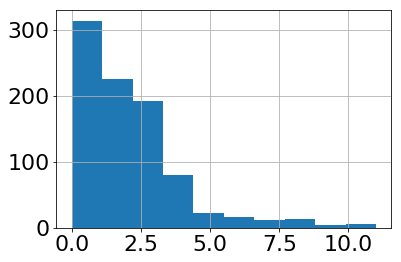

In [173]:
dft['gdprange'].hist()

In [174]:
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(dft, 'suiciderange', 'gdprange')

(334.1762311550606,
 9.489473719700533e-34,
 77,
 array([[2.58951613e+01, 2.81935484e+01, 4.22903226e+01, 1.65483871e+01,
         9.65322581e+00, 4.44354839e+00, 2.60483871e+00, 3.37096774e+00],
        [3.15414747e+01, 3.43410138e+01, 5.15115207e+01, 2.01566820e+01,
         1.17580645e+01, 5.41244240e+00, 3.17281106e+00, 4.10599078e+00],
        [4.36129032e+01, 4.74838710e+01, 7.12258065e+01, 2.78709677e+01,
         1.62580645e+01, 7.48387097e+00, 4.38709677e+00, 5.67741935e+00],
        [3.75771889e+01, 4.09124424e+01, 6.13686636e+01, 2.40138249e+01,
         1.40080645e+01, 6.44815668e+00, 3.77995392e+00, 4.89170507e+00],
        [1.55760369e+01, 1.69585253e+01, 2.54377880e+01, 9.95391705e+00,
         5.80645161e+00, 2.67281106e+00, 1.56682028e+00, 2.02764977e+00],
        [4.47811060e+00, 4.87557604e+00, 7.31336406e+00, 2.86175115e+00,
         1.66935484e+00, 7.68433180e-01, 4.50460829e-01, 5.82949309e-01],
        [3.11520737e+00, 3.39170507e+00, 5.08755760e+00, 1.99078341e+

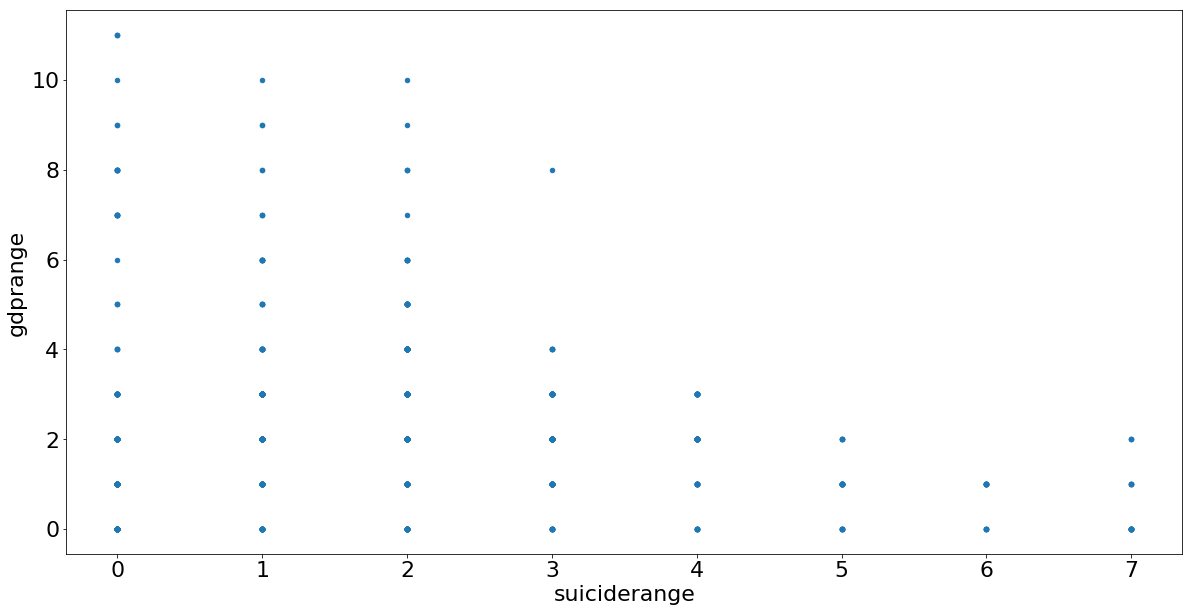

In [176]:
dft['suiciderange'].corr(dft['gdprange'])

fig, ax = plt.subplots(figsize=(20,10))
test = dft.plot.scatter('suiciderange','gdprange',ax=ax) 

Text(0, 0.5, 'Região')

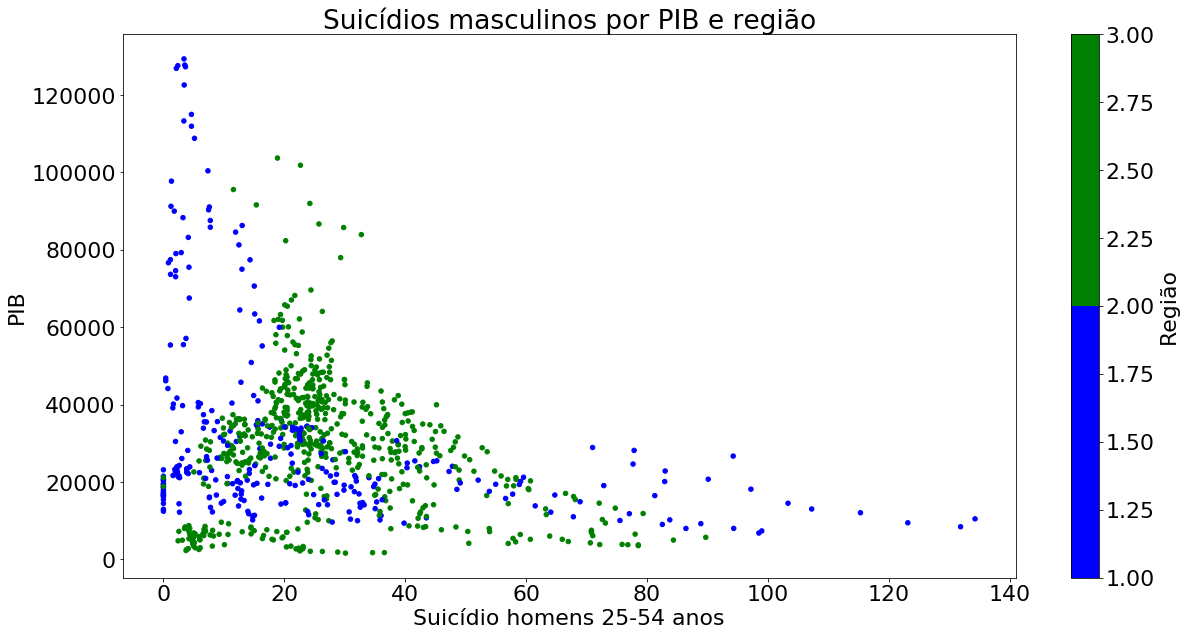

In [135]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = ListedColormap(['blue', 'green'])
test = dft.plot.scatter('suicidio3554','gdp',c='idincome',ax=ax, cmap=cmap) 

#ax.set_ylim(0,60000)
ax.set_ylabel('PIB')
ax.set_xlabel('Suicídio homens 25-54 anos')
ax.set_title("Suicídios masculinos por PIB e região")

f = plt.gcf()
cax = f.get_axes()[1]
#and we can modify it, i.e.:
cax.set_ylabel('Região')


In [55]:
clf = LogisticRegression()

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(df2.gdp.values.reshape(-1,1))
clf.fit(df2.suicidio2534.values.reshape(-1,1), df2.gdp.values.reshape(-1,1))
#model.fit(df2.suicidio2534.values.reshape(-1,1),training_scores_encoded)


/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True

/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nicoedu/a

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)


/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


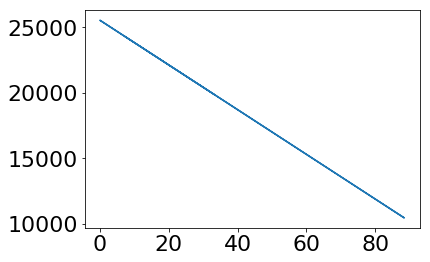

17247.621467907487
0.03549601987134199


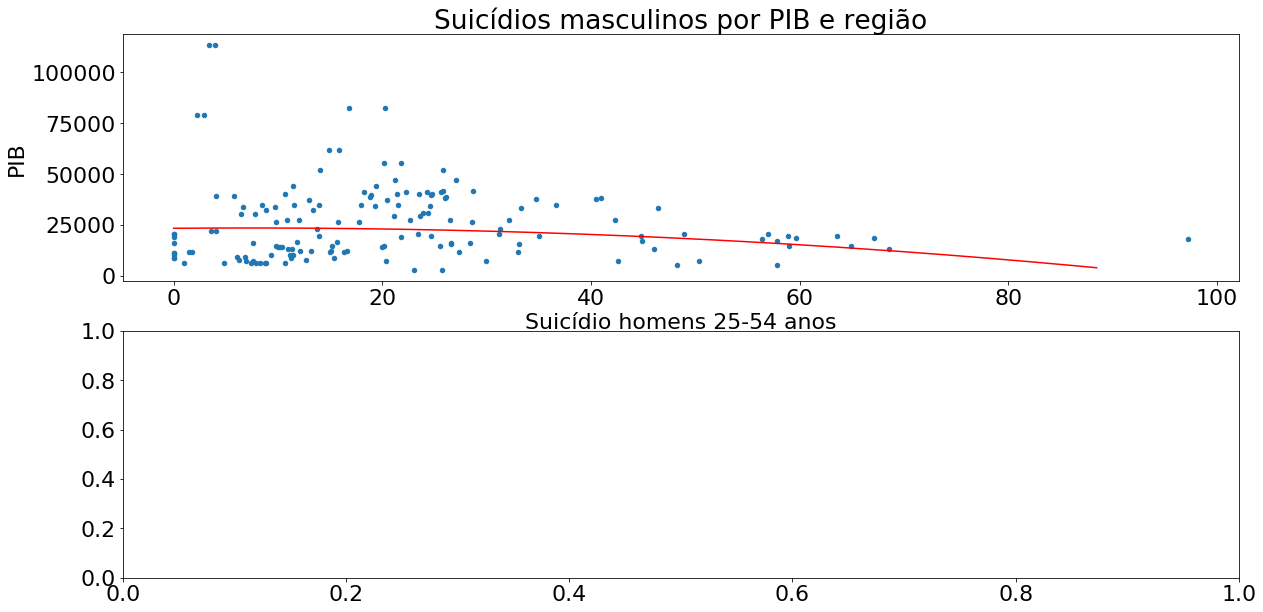

In [97]:
trainingData    = np.array(df2.suicidio2534.values.reshape(-1,1))
trainingScores  = np.array(df2.gdp.values.reshape(-1,1))
predictionData  = np.array(range(100)).reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(trainingData)

model = LinearRegression()
model.fit(x_poly, trainingScores)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(trainingScores,y_poly_pred))
r2 = r2_score(trainingScores,y_poly_pred)
print(rmse)
print(r2)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(trainingData,y_poly_pred), key=sort_axis)
trainingData, y_poly_pred = zip(*sorted_zip)

fig, ax = plt.subplots(2,1,figsize=(20,10))
test = dfmelt[dfmelt.year == 2009].plot.scatter('Value','gdp',ax=ax[0]) 

#ax.set_xlim(0,100000)
ax[0].set_ylabel('PIB')
ax[0].set_xlabel('Suicídio homens 25-54 anos')
ax[0].set_title("Suicídios masculinos por PIB e região")
ax[0].plot(trainingData, y_poly_pred, color='red')


In [50]:
clf.predict(np.array(range(100)).reshape(-1, 1))

array([ 583,   23, 1196,  751,  859,  475,  882,  103,  467,  476,  516,
         33,  352,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220,  220,  220,  220,  220,  220,  220,  220,  220,  220,  220,
        220])